#### Continuation from previous notebook

1. More feature engineering on merged dataset:
   1. On top 15 / 20 / 30 importances
   2. Extract top 300+ columns of top importances 
   3. Out of 1.A and 1.B, find a base and add on new features
2. Run models: 
   1. Random Forest on point 1.A and 1.B above (compare with previous notebook)
   2. KNN on point 1.B above
   3. SVC on point 1.B above - failed
   4. Logistic Regression on point 1.A and 1.B above and all 
   5. Decision tree on point 1.B above
   6. AdaBoost with 6 on point 1.B above
   7. Ensemble of ensembles on point 1.B above
   8. 

## Load Preprocessed Data

In [1]:
## IMPORTS ##

# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib for plotting
import matplotlib.pyplot as plt

# garbage collector
import gc

In [2]:
# Load data fcn
def load_credit_data(data_path):
    csv_path = os.path.join("data", data_path)
    return pd.read_csv(csv_path)

In [3]:
# Load training data
training_df = load_credit_data ("training_merged_preprocessed.csv")
print (training_df.shape)

(307511, 509)


In [4]:
# Load test data
testing_df = load_credit_data ("testing_merged_preprocessed.csv")
print (testing_df.shape)

(48744, 509)


In [5]:
# Load labels data
labels_df = load_credit_data ("y_labels.csv")
print (labels_df.shape)
labels_df.head()

(307511, 1)


,TARGET
0,1
1,0
2,0
3,0
4,0


## Feature selection (on top 15 / 20 / 30 important features)

In [6]:
# Look at just important features
y_train = labels_df['TARGET'].copy()

# Top 30
X_train_important = training_df [['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'df_avg_bureau_full_DAYS_CREDIT', 'df_avg_bureau_full_DAYS_CREDIT_ENDDATE', 'AMT_PAYMENT_df_avg_install', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'df_avg_bureau_full_DAYS_CREDIT_UPDATE', 'df_avg_pos_cash_CNT_INSTALMENT_FUTURE', 'AMT_INSTALMENT_df_avg_install', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'DAYS_ENTRY_PAYMENT_df_avg_install', 'DAYS_INSTALMENT_df_avg_install', 'df_avg_previous_app_DAYS_FIRST_DUE', 'df_avg_previous_app_DAYS_DECISION', 'df_avg_previous_app_HOUR_APPR_PROCESS_START', 'df_avg_previous_app_AMT_ANNUITY', 'df_avg_previous_app_AMT_CREDIT', 'df_avg_previous_app_AMT_GOODS_PRICE', 'df_avg_previous_app_AMT_APPLICATION', 'df_avg_previous_app_SELLERPLACE_AREA', 'REGION_POPULATION_RELATIVE', 'df_avg_previous_app_DAYS_LAST_DUE_1ST_VERSION', 'df_avg_bureau_full_AMT_CREDIT_SUM', 'AMT_INCOME_TOTAL']]
X_test_important = testing_df [['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'df_avg_bureau_full_DAYS_CREDIT', 'df_avg_bureau_full_DAYS_CREDIT_ENDDATE', 'AMT_PAYMENT_df_avg_install', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'df_avg_bureau_full_DAYS_CREDIT_UPDATE', 'df_avg_pos_cash_CNT_INSTALMENT_FUTURE', 'AMT_INSTALMENT_df_avg_install', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'DAYS_ENTRY_PAYMENT_df_avg_install', 'DAYS_INSTALMENT_df_avg_install', 'df_avg_previous_app_DAYS_FIRST_DUE', 'df_avg_previous_app_DAYS_DECISION', 'df_avg_previous_app_HOUR_APPR_PROCESS_START', 'df_avg_previous_app_AMT_ANNUITY', 'df_avg_previous_app_AMT_CREDIT', 'df_avg_previous_app_AMT_GOODS_PRICE', 'df_avg_previous_app_AMT_APPLICATION', 'df_avg_previous_app_SELLERPLACE_AREA', 'REGION_POPULATION_RELATIVE', 'df_avg_previous_app_DAYS_LAST_DUE_1ST_VERSION', 'df_avg_bureau_full_AMT_CREDIT_SUM', 'AMT_INCOME_TOTAL']]

In [7]:
X_train_important.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1,DAYS_ID_PUBLISH,DAYS_REGISTRATION,df_avg_bureau_full_DAYS_CREDIT,df_avg_bureau_full_DAYS_CREDIT_ENDDATE,AMT_PAYMENT_df_avg_install,AMT_ANNUITY,...,df_avg_previous_app_HOUR_APPR_PROCESS_START,df_avg_previous_app_AMT_ANNUITY,df_avg_previous_app_AMT_CREDIT,df_avg_previous_app_AMT_GOODS_PRICE,df_avg_previous_app_AMT_APPLICATION,df_avg_previous_app_SELLERPLACE_AREA,REGION_POPULATION_RELATIVE,df_avg_previous_app_DAYS_LAST_DUE_1ST_VERSION,df_avg_bureau_full_AMT_CREDIT_SUM,AMT_INCOME_TOTAL
0,0.262949,0.139376,-9461,0.083037,-2120,-3648.0,-874.00,-344.25,11559.247105,24700.5,...,9.000000,9251.775,179055.00,179055.00,179055.00,500.000000,0.018801,125.000000,108131.945625,202500.0
1,0.622246,0.535276,-16765,0.311267,-291,-1186.0,-1400.75,-544.50,64754.586000,35698.5,...,14.666667,56553.990,484191.00,435436.50,435436.50,533.000000,0.003541,-1004.333333,254350.125000,270000.0
2,0.555912,0.729567,-19046,0.505998,-2531,-4260.0,-867.00,-488.50,7096.155000,6750.0,...,5.000000,5357.250,20106.00,24282.00,24282.00,30.000000,0.010032,-694.000000,94518.900000,67500.0
3,0.650442,0.535276,-19005,0.505998,-2437,-9833.0,0.00,0.00,62947.088438,29686.5,...,14.666667,19517.450,291695.50,309643.26,272203.26,894.222222,0.008019,40503.444444,0.000000,135000.0
4,0.322738,0.535276,-19932,0.505998,-3458,-4311.0,-1149.00,-783.00,12214.060227,21865.5,...,12.333333,12278.805,166638.75,150530.25,150530.25,409.166667,0.028663,-757.833333,146250.000000,121500.0


In [8]:
X_test_important.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_1,DAYS_ID_PUBLISH,DAYS_REGISTRATION,df_avg_bureau_full_DAYS_CREDIT,df_avg_bureau_full_DAYS_CREDIT_ENDDATE,AMT_PAYMENT_df_avg_install,AMT_ANNUITY,...,df_avg_previous_app_HOUR_APPR_PROCESS_START,df_avg_previous_app_AMT_ANNUITY,df_avg_previous_app_AMT_CREDIT,df_avg_previous_app_AMT_GOODS_PRICE,df_avg_previous_app_AMT_APPLICATION,df_avg_previous_app_SELLERPLACE_AREA,REGION_POPULATION_RELATIVE,df_avg_previous_app_DAYS_LAST_DUE_1ST_VERSION,df_avg_bureau_full_AMT_CREDIT_SUM,AMT_INCOME_TOTAL
0,0.789654,0.159520,-19241,0.752614,-812,-5170.0,-735.000000,82.428571,5885.132143,20560.5,...,13.0,3951.00000,23787.000,24835.50,24835.50,23.0,0.018850,-1499.0,207623.571429,135000.0
1,0.291656,0.432962,-18064,0.564990,-1623,-9118.0,-190.666667,439.333333,6240.205000,17370.0,...,10.5,8031.60000,20076.750,78468.75,22308.75,18.0,0.035792,-368.5,219042.000000,99000.0
2,0.699787,0.610991,-20038,0.506771,-3503,-2175.0,-1737.500000,-1068.000000,9740.235774,69777.0,...,14.5,11421.14625,146134.125,158951.25,130871.25,82.0,0.019101,-477.0,518070.015000,202500.0
3,0.509677,0.612704,-13976,0.525734,-4208,-2000.0,-1401.750000,1934.750000,4356.731549,49018.5,...,10.8,9354.95100,92920.500,94135.50,49207.50,1409.6,0.026392,72588.4,126739.590000,315000.0
4,0.425687,0.519097,-13040,0.202145,-4262,-4000.0,0.000000,0.000000,11100.337500,32067.0,...,5.5,17782.15500,300550.500,267727.50,267727.50,13.0,0.010032,-409.0,0.000000,180000.0


### Top 30 on Random Forest 

In [9]:
# ROC curve
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [10]:
# Run GridSearch cross validation with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestClassifier(random_state=123)

# Random forest (similar to before with 250 + much smaller 20) 
param_grid = {'n_estimators': [20, 250]}

# CV = 3 to cut short computational time
grid_search_train_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid , cv=3, scoring='roc_auc', verbose=100)

grid_search_train_rf.fit(X_train_important, y_train)

# Results of the grid search in general
cvres = grid_search_train_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6765167707557205, total=  24.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.0s remaining:    0.0s
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6723283346583926, total=  25.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   52.8s remaining:    0.0s
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6752317513078454, total=  25.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s
[CV] n_estimators=250 ................................................
[CV] ....... n_estimators=250, score=0.7274349578206645, total= 5.1min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.7min remaining:    0.0s
[CV] n_estimators=250 ...............................

In [15]:
# Find BEST model
from sklearn.model_selection import cross_val_predict

forest_merge_clf = grid_search_train_rf.best_estimator_
y_probas_merge_forest = cross_val_predict(forest_merge_clf, X_train_important, y_train, cv=3, method="predict_proba")
y_scores_merge_forest = y_probas_merge_forest[:, 1] 
fpr_merge_forest, tpr_merge_forest, thresholds_merge_forest = roc_curve(y_train, y_scores_merge_forest)

print ("AUC: ", auc(fpr_merge_forest, tpr_merge_forest))

AUC:  0.7241656994488614


In [27]:
predictions = forest_merge_clf.predict_proba(X_test_important)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('random_forest_30_importance.csv', index = False)

### Top 15 / 20 (with Polynomial Features) on Random Forest 

In [11]:
# Now, top 15 only
X_train_important = training_df [['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'df_avg_bureau_full_DAYS_CREDIT', 'df_avg_bureau_full_DAYS_CREDIT_ENDDATE', 'AMT_PAYMENT_df_avg_install', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'df_avg_bureau_full_DAYS_CREDIT_UPDATE', 'df_avg_pos_cash_CNT_INSTALMENT_FUTURE', 'AMT_INSTALMENT_df_avg_install', 'DAYS_LAST_PHONE_CHANGE']]
X_test_important = testing_df [['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'df_avg_bureau_full_DAYS_CREDIT', 'df_avg_bureau_full_DAYS_CREDIT_ENDDATE', 'AMT_PAYMENT_df_avg_install', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'df_avg_bureau_full_DAYS_CREDIT_UPDATE', 'df_avg_pos_cash_CNT_INSTALMENT_FUTURE', 'AMT_INSTALMENT_df_avg_install', 'DAYS_LAST_PHONE_CHANGE']]

In [12]:
# Run Polynomial Features (of 2) on the top 15 important features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
p = poly.fit(X_train_important)

X_tr = poly.transform (X_train_important) 
X_te = poly.transform (X_test_important) 

In [13]:
X_tr.shape

(307511, 120)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr)

X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

In [23]:
# Run GridSearch cross validation with Random Forest

poly_rf = RandomForestClassifier(random_state=123)

# Random forest (similar to before with 250 + a bit bigger 300) 
param_grid = {'n_estimators': [250, 300]}

# CV = 3 to cut short computational time
grid_search_poly_rf = GridSearchCV(estimator=poly_rf, param_grid=param_grid , cv=3, scoring='roc_auc', verbose=100)

grid_search_poly_rf.fit(X_tr, y_train)

# Results of the grid search in general
cvres = grid_search_poly_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_estimators=250 ................................................
[CV] ....... n_estimators=250, score=0.7135574204886669, total=12.8min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.0min remaining:    0.0s
[CV] n_estimators=250 ................................................
[CV] ....... n_estimators=250, score=0.7077648470899089, total=12.8min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 26.0min remaining:    0.0s
[CV] n_estimators=250 ................................................
[CV] ....... n_estimators=250, score=0.7147837622623122, total=17.7min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 44.0min remaining:    0.0s
[CV] n_estimators=300 ................................................
[CV] ........ n_estimators=300, score=0.714585641286114, total=15.9min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 60.2min remaining:    0.0s
[CV] n_estimators=300 ...............................

In [29]:
forest_polymerge_clf = grid_search_poly_rf.best_estimator_
y_probas_poly_forest = cross_val_predict(forest_polymerge_clf, X_tr, y_train, cv=3, method="predict_proba")
y_scores_poly_forest = y_probas_poly_forest[:, 1] 
fpr_poly_forest, tpr_poly_forest, thresholds_poly_forest = roc_curve(y_train, y_scores_poly_forest)

print ("AUC: ", auc(fpr_poly_forest, tpr_poly_forest))

AUC:  0.7127933335004827


In [31]:
predictions = forest_polymerge_clf.predict_proba(X_te)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('random_forest_15_importance.csv', index = False)

In [15]:
# Late add-on. Try with log reg.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_rf = LogisticRegression(random_state=123)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}

# CV = 3 to cut short computational time
grid_search_log_rf = GridSearchCV(estimator=log_rf, param_grid=param_grid , cv=3, scoring='roc_auc', verbose=100)

grid_search_log_rf.fit(X_tr, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7242571047027268, total=   2.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7205894953026147, total=   3.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7281903852928815, total=   3.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s remaining:    0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.7307548048001207, total=   7.3s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.6s remaining:    0.0s
[CV] C=0.001, penalty=l2 ..........................

[CV] ..... C=1000, penalty=l1, score=0.7284226281804509, total= 9.1min
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 100.2min remaining:    0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ..... C=1000, penalty=l1, score=0.7370599549822395, total=10.1min
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 110.3min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.7324131867601968, total=  32.7s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 110.9min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.7284159298365469, total=  41.7s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed: 111.6min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.7370539683459815, total=  42.2s
[Parallel(n_jobs=1)]: Done  42 out of

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=100)

In [16]:
# Find BEST model
from sklearn.model_selection import cross_val_predict

log_final_clf = grid_search_log_rf.best_estimator_
y_probas_log_final = cross_val_predict(log_final_clf, X_tr, y_train, cv=3, method="predict_proba")
y_scores_log_final = y_probas_log_final[:, 1] 
fpr_log_final, tpr_log_final, thresholds_log_final = roc_curve(y_train, y_scores_log_final)

print ("AUC: ", auc(fpr_log_final, tpr_log_final))

AUC:  0.7326402918958993


In [17]:
predictions = log_final_clf.predict_proba(X_te)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('poly_log_final_importance.csv', index = False)

### More tweaking with Poly Features

#### Poly-2 with top 20

In [32]:
# Now, top 20 only
X_20train_important = training_df [['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'df_avg_bureau_full_DAYS_CREDIT', 'df_avg_bureau_full_DAYS_CREDIT_ENDDATE', 'AMT_PAYMENT_df_avg_install', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'df_avg_bureau_full_DAYS_CREDIT_UPDATE', 'df_avg_pos_cash_CNT_INSTALMENT_FUTURE', 'AMT_INSTALMENT_df_avg_install', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'DAYS_ENTRY_PAYMENT_df_avg_install', 'DAYS_INSTALMENT_df_avg_install', 'df_avg_previous_app_DAYS_FIRST_DUE', 'df_avg_previous_app_DAYS_DECISION']]
X_20test_important = testing_df [['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'df_avg_bureau_full_DAYS_CREDIT', 'df_avg_bureau_full_DAYS_CREDIT_ENDDATE', 'AMT_PAYMENT_df_avg_install', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'df_avg_bureau_full_DAYS_CREDIT_UPDATE', 'df_avg_pos_cash_CNT_INSTALMENT_FUTURE', 'AMT_INSTALMENT_df_avg_install', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'DAYS_ENTRY_PAYMENT_df_avg_install', 'DAYS_INSTALMENT_df_avg_install', 'df_avg_previous_app_DAYS_FIRST_DUE', 'df_avg_previous_app_DAYS_DECISION']]

In [33]:
# Run Polynomial Features (of 2) on the top 20 important features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
p = poly.fit(X_20train_important)

X_20tr = poly.transform (X_20train_important) 
X_20te = poly.transform (X_20test_important) 

In [34]:
X_20tr.shape

(307511, 210)

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_20tr)

X_20tr = scaler.transform(X_20tr)
X_20te = scaler.transform(X_20te)

In [37]:
# Run GridSearch cross validation with Random Forest

poly20_rf = RandomForestClassifier(random_state=123)

# Random forest  
param_grid = {'n_estimators': [20, 275]}

# CV = 2 to cut short computational time
grid_search_poly20_rf = GridSearchCV(estimator=poly20_rf, param_grid=param_grid , cv=2, scoring='roc_auc', verbose=100)

grid_search_poly20_rf.fit(X_20tr, y_train)

# Results of the grid search in general
cvres = grid_search_poly20_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6692410435341052, total= 1.2min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
[CV] n_estimators=20 .................................................
[CV] ......... n_estimators=20, score=0.666434328293146, total= 1.1min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s
[CV] n_estimators=275 ................................................
[CV] ....... n_estimators=275, score=0.7106483517618999, total=25.7min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 28.2min remaining:    0.0s
[CV] n_estimators=275 ................................................
[CV] ....... n_estimators=275, score=0.7102088470275894, total=15.1min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 43.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 

In [44]:
predictions = grid_search_poly20_rf.best_estimator_.predict_proba(X_20te)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('random_forest_20_importance.csv', index = False)

#### Poly-3 with top 15

In [40]:
# Run Polynomial Features (of 3) on the top 15 important features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, interaction_only = True, include_bias = False)
p = poly.fit(X_train_important)

X_3tr = poly.transform (X_train_important) 
X_3te = poly.transform (X_test_important) 

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_3tr)

X_3tr = scaler.transform(X_3tr)
X_3te = scaler.transform(X_3te)

In [42]:
X_3tr.shape

(307511, 575)

In [43]:
# Run GridSearch cross validation with Random Forest

poly3_rf = RandomForestClassifier(random_state=123)

# Random forest 
param_grid = {'n_estimators': [20, 275]}

# CV = 2 to cut short computational time
grid_search_poly3_rf = GridSearchCV(estimator=poly3_rf, param_grid=param_grid , cv=2, scoring='roc_auc', verbose=100)

grid_search_poly3_rf.fit(X_3tr, y_train)

# Results of the grid search in general
cvres = grid_search_poly3_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6634079110249627, total= 1.9min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6630187553822376, total= 1.9min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.8min remaining:    0.0s
[CV] n_estimators=275 ................................................
[CV] ....... n_estimators=275, score=0.7041909731250383, total=26.4min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 30.5min remaining:    0.0s
[CV] n_estimators=275 ................................................
[CV] ....... n_estimators=275, score=0.7051535376777838, total=26.6min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 57.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 

In [45]:
predictions = grid_search_poly3_rf.best_estimator_.predict_proba(X_3te)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('random_forest_3_importance.csv', index = False)

### Top 300 (without high correlation) on Random Forest
#### First drop columns with importance less 0.0005

In [10]:
# Load importance data
feature_importances = load_credit_data ("feature_importances_merged_sorted.csv")

# Find poor features (arbitrary threshold 0.0005)
poor_features = list(feature_importances[feature_importances['importance'] < 0.0005]['feature'])
print('There are %d features with less 0.0005 importance' % len(poor_features))

There are 175 features with less 0.0005 importance


In [11]:
poor_features

['OCCUPATION_TYPE_Cleaning staff',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'ORGANIZATION_TYPE_Business Entity Type 1',
 'df_avg_previous_app_NAME_CASH_LOAN_PURPOSE_Medicine',
 'df_avg_previous_app_NAME_GOODS_CATEGORY_Office Appliances',
 'ORGANIZATION_TYPE_Medicine',
 'df_avg_previous_app_NAME_TYPE_SUITE_Group of people',
 'df_avg_previous_app_NAME_GOODS_CATEGORY_Sport and Leisure',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Trade: type 3',
 'df_avg_bureau_full_df_sum_bureau_bal_STATUS__4',
 'df_avg_previous_app_CODE_REJECT_REASON_VERIF',
 'df_avg_previous_app_NAME_CASH_LOAN_PURPOSE_Payments on other loans',
 'NAME_TYPE_SUITE_Children',
 'OCCUPATION_TYPE_High skill tech staff',
 'ORGANIZATION_TYPE_Agriculture',
 'ORGANIZATION_TYPE_Kindergarten',
 'ORGANIZATION_TYPE_Security',
 'OCCUPATION_TYPE_Medicine staff',
 'df_avg_previous_app_NAME_CASH_LOAN_PURPOSE_Everyday expenses',
 'ORGANIZATION_TYPE_School',
 'FLAG_DOCUMENT_5',
 'df_avg_previous_app_NAME_GOODS_CATEGORY_Ga

In [12]:
# Remove those features
top_training_df = training_df.drop(columns = poor_features)
top_testing_df = testing_df.drop(columns = poor_features)

print('Training shape: ', top_training_df.shape)
print('Testing shape: ', top_testing_df.shape)

Training shape:  (307511, 334)
Testing shape:  (48744, 334)


#### Second drop columns with correlation > 0.90

In [13]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = top_training_df.corr().abs()
corr_matrix.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,df_avg_pos_cash_NAME_CONTRACT_STATUS__Completed,df_avg_pos_cash_NAME_CONTRACT_STATUS__Returned to the store,df_avg_pos_cash_NAME_CONTRACT_STATUS__Signed,SK_ID_PREV_df_avg_install,NUM_INSTALMENT_VERSION_df_avg_install,NUM_INSTALMENT_NUMBER_df_avg_install,DAYS_INSTALMENT_df_avg_install,DAYS_ENTRY_PAYMENT_df_avg_install,AMT_INSTALMENT_df_avg_install,AMT_PAYMENT_df_avg_install
CNT_CHILDREN,1.000000,0.012882,0.002145,0.021377,0.001856,0.025573,0.330938,0.239818,0.183395,0.028019,...,0.032172,0.007098,0.018951,0.027959,0.000395,0.018372,0.016923,0.016894,0.016069,0.017802
AMT_INCOME_TOTAL,0.012882,1.000000,0.156870,0.191657,0.159632,0.074796,0.027261,0.064223,0.027805,0.008506,...,0.001148,0.001847,0.003613,0.018304,0.006702,0.015066,0.008114,0.008436,0.072202,0.071600
AMT_CREDIT,0.002145,0.156870,1.000000,0.770127,0.986734,0.099738,0.055436,0.066838,0.009621,0.006575,...,0.015925,0.008273,0.019757,0.043097,0.025003,0.053916,0.046025,0.045590,0.130859,0.134209
AMT_ANNUITY,0.021377,0.191657,0.770127,1.000000,0.774837,0.118418,0.009443,0.104329,0.038514,0.011267,...,0.042013,0.003109,0.012460,0.022048,0.009907,0.036663,0.034275,0.034038,0.160239,0.157750
AMT_GOODS_PRICE,0.001856,0.159632,0.986734,0.774837,1.000000,0.103519,0.053510,0.064767,0.011546,0.009289,...,0.016597,0.008120,0.019433,0.036975,0.020915,0.046563,0.044585,0.044182,0.133820,0.137636


In [14]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,df_avg_pos_cash_NAME_CONTRACT_STATUS__Completed,df_avg_pos_cash_NAME_CONTRACT_STATUS__Returned to the store,df_avg_pos_cash_NAME_CONTRACT_STATUS__Signed,SK_ID_PREV_df_avg_install,NUM_INSTALMENT_VERSION_df_avg_install,NUM_INSTALMENT_NUMBER_df_avg_install,DAYS_INSTALMENT_df_avg_install,DAYS_ENTRY_PAYMENT_df_avg_install,AMT_INSTALMENT_df_avg_install,AMT_PAYMENT_df_avg_install
CNT_CHILDREN,NaN,0.012882,0.002145,0.021377,0.001856,0.025573,0.330938,0.239818,0.183395,0.028019,...,0.032172,0.007098,0.018951,0.027959,0.000395,0.018372,0.016923,0.016894,0.016069,0.017802
AMT_INCOME_TOTAL,NaN,NaN,0.156870,0.191657,0.159632,0.074796,0.027261,0.064223,0.027805,0.008506,...,0.001148,0.001847,0.003613,0.018304,0.006702,0.015066,0.008114,0.008436,0.072202,0.071600
AMT_CREDIT,NaN,NaN,NaN,0.770127,0.986734,0.099738,0.055436,0.066838,0.009621,0.006575,...,0.015925,0.008273,0.019757,0.043097,0.025003,0.053916,0.046025,0.045590,0.130859,0.134209
AMT_ANNUITY,NaN,NaN,NaN,NaN,0.774837,0.118418,0.009443,0.104329,0.038514,0.011267,...,0.042013,0.003109,0.012460,0.022048,0.009907,0.036663,0.034275,0.034038,0.160239,0.157750
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,0.103519,0.053510,0.064767,0.011546,0.009289,...,0.016597,0.008120,0.019433,0.036975,0.020915,0.046563,0.044585,0.044182,0.133820,0.137636


In [15]:
# Select columns with correlations above threshold
corr_columns = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(corr_columns)))

There are 67 columns to remove.


In [16]:
corr_columns

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_M',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_Y',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'HOUSETYPE_MODE_block of flats',
 'WALLSMATERIAL_MODE_Unspecified',
 'EMERGENCYSTATE_MODE_No',
 'EMERGENCYSTA

In [17]:
top_training_df = top_training_df.drop(columns = corr_columns)
top_testing_df = top_testing_df.drop(columns = corr_columns)

print('Training shape: ', top_training_df.shape)
print('Testing shape: ', top_testing_df.shape)

Training shape:  (307511, 267)
Testing shape:  (48744, 267)


In [68]:
# Run GridSearch cross validation with Random Forest

final_rf = RandomForestClassifier(random_state=123)

# Random forest (similar to before with 250 + a bit bigger 300) 
param_grid = {'n_estimators': [20, 250, 300]}

# CV = 3 to cut short computational time
grid_search_final_rf = GridSearchCV(estimator=final_rf, param_grid=param_grid , cv=3, scoring='roc_auc', verbose=100)

grid_search_final_rf.fit(top_training_df, y_train)

# Results of the grid search in general
cvres = grid_search_final_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6765903326276645, total=  32.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.6s remaining:    0.0s
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6715615422850272, total=  32.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[CV] n_estimators=20 .................................................
[CV] ........ n_estimators=20, score=0.6786658849070462, total=  32.5s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s
[CV] n_estimators=250 ................................................
[CV] ........ n_estimators=250, score=0.735539944326028, total= 6.5min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.6min remaining:    0.0s
[CV] n_estimators=250 ...............................

In [69]:
# Find BEST model

forest_final_clf = grid_search_final_rf.best_estimator_
y_probas_final_forest = cross_val_predict(forest_final_clf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_final_forest = y_probas_final_forest[:, 1] 
fpr_final_forest, tpr_final_forest, thresholds_final_forest = roc_curve(y_train, y_scores_final_forest)

print ("AUC: ", auc(fpr_final_forest, tpr_final_forest))

AUC:  0.7355215039409143


In [70]:
predictions = forest_final_clf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('random_forest_final_importance.csv', index = False)

### Plot Curves

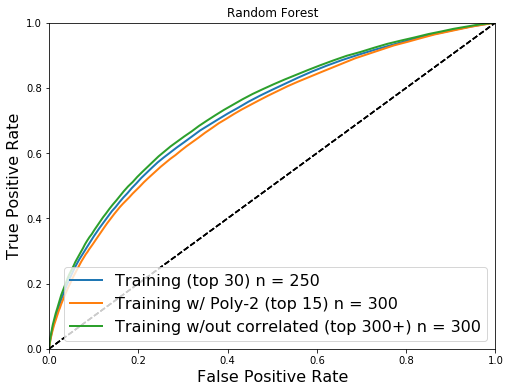

In [71]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_merge_forest, tpr_merge_forest, "Training (top 30) n = 250")
plot_roc_curve(fpr_poly_forest, tpr_poly_forest, "Training w/ Poly-2 (top 15) n = 300")
plot_roc_curve(fpr_final_forest, tpr_final_forest, "Training w/out correlated (top 300+) n = 300")
plt.legend(loc="lower right", fontsize=16)
plt.title("Random Forest")
plt.show()

### Submission Scores
1. Top 30 only RF : 0.710
2. Top 15 with poly-2 RF : 0.697
3. Top 20 with poly-2 RF : 0.693
4. Top 20 with poly-3 RF : --- DID NOT SUBMIT ---
5. Top 300+ with drop correlation RF : 0.718 **
6. Top 15 with poly-2 LOG (late add-on): 0.725 **

** Try final engineered dataset on 

## Investigate models
Using 5 as the base, try this subset with other models.

#### Save to file for future use

In [17]:
top_training_df.to_csv('training_top.csv', index = False)
top_testing_df.to_csv('testing_top.csv', index = False)

### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# General rule of thumb in choosing the value of k is k = sqrt(N)/2, N = size of training set
model_knn = Lo()
param_grid = {'n_neighbors': [277]}

grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid , cv=2, scoring='roc_auc', verbose=100)
grid_search_knn.fit(top_training_df, y_train)
    
# Results of the grid search for best n_estimator
print(grid_search_knn.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_knn.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] n_neighbors=277 .................................................
[CV] ........ n_neighbors=277, score=0.6253542253826272, total=19.8min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 46.2min remaining:    0.0s
[CV] n_neighbors=277 .................................................
[CV] ....... n_neighbors=277, score=0.6241971530486236, total=179.7min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 243.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 243.2min finished
{'n_neighbors': 277}
------------
0.6247756910969765 {'n_neighbors': 277}


### Logistic Regression
(as opposed to Linear SVC)

#### On top 300+

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_rf = LogisticRegression(random_state=123)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}

# CV = 3 to cut short computational time
grid_search_log_rf = GridSearchCV(estimator=log_rf, param_grid=param_grid , cv=3, scoring='roc_auc', verbose=100)

grid_search_log_rf.fit(top_training_df, y_train)

# Results of the grid search in general
cvres = grid_search_log_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.6999272948184115, total=  10.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.6995874837154289, total=   9.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.3s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7034268721736452, total=  10.5s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   32.4s remaining:    0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.6063904586239879, total=  42.6s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s
[CV] C=0.001, penalty=l2 ..........................

[CV] ..... C=1000, penalty=l1, score=0.7583222424742141, total= 2.3min
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 48.3min remaining:    0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ..... C=1000, penalty=l1, score=0.7645737234120186, total= 2.6min
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 50.9min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6107739161768885, total=  45.9s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 51.7min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6408905950307664, total= 1.2min
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed: 52.9min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6173307066346884, total=  47.4s
[Parallel(n_jobs=1)]: Done  42 out of  42

In [21]:
# Find BEST model
from sklearn.model_selection import cross_val_predict

log_final_clf = grid_search_log_rf.best_estimator_
y_probas_log_final = cross_val_predict(log_final_clf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_log_final = y_probas_log_final[:, 1] 
fpr_log_final, tpr_log_final, thresholds_log_final = roc_curve(y_train, y_scores_log_final)

print ("AUC: ", auc(fpr_log_final, tpr_log_final))

AUC:  0.7615959320002902


In [22]:
predictions = log_final_clf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('log_final_importance.csv', index = False)

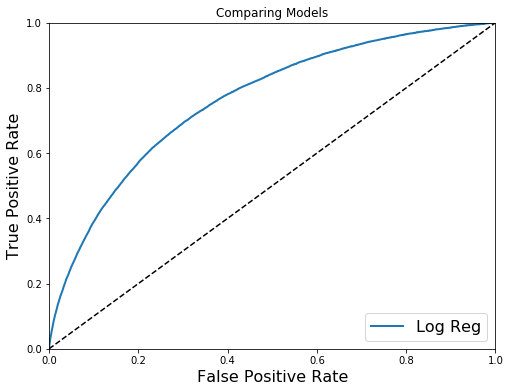

In [23]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_log_final, tpr_log_final, "Log Reg")
plt.legend(loc="lower right", fontsize=16)
plt.title("Comparing Models")
plt.show()

#### On top 30

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_rf = LogisticRegression(random_state=123)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}

# CV = 3 to cut short computational time
grid_search_log_rf = GridSearchCV(estimator=log_rf, param_grid=param_grid , cv=3, scoring='roc_auc', verbose=100)

grid_search_log_rf.fit(X_train_important, y_train)

# Results of the grid search in general
cvres = grid_search_log_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.6916875661814941, total=  12.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.6956710763028642, total=  13.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.6s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.6969638494635433, total=  15.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.1s remaining:    0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] ..... C=0.001, penalty=l2, score=0.641888360999056, total=   5.7s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   47.9s remaining:    0.0s
[CV] C=0.001, penalty=l2 ..........................

[CV] ...... C=1000, penalty=l1, score=0.729474034763738, total=   9.8s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  6.9min remaining:    0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ..... C=1000, penalty=l1, score=0.7375986522117017, total=   9.7s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  7.1min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6418647122413326, total=   6.1s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.2min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6445382799677548, total=  12.6s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:  7.4min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6443139959937758, total=  14.2s
[Parallel(n_jobs=1)]: Done  42 out of  42

In [21]:
# Find BEST model
from sklearn.model_selection import cross_val_predict

log_final_clf = grid_search_log_rf.best_estimator_
y_probas_log_final = cross_val_predict(log_final_clf, X_train_important, y_train, cv=3, method="predict_proba")
y_scores_log_final = y_probas_log_final[:, 1] 
fpr_log_final, tpr_log_final, thresholds_log_final = roc_curve(y_train, y_scores_log_final)

print ("AUC: ", auc(fpr_log_final, tpr_log_final))

AUC:  0.7330963364893834


In [24]:
predictions = log_final_clf.predict_proba(X_test_important)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('log_top_30_importance.csv', index = False)

#### On all columns 

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_rf = LogisticRegression(random_state=123)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty': ['l1', 'l2']}

# CV = 3 to cut short computational time
grid_search_log_rf = GridSearchCV(estimator=log_rf, param_grid=param_grid , cv=3, scoring='roc_auc', verbose=100)

grid_search_log_rf.fit(training_df, y_train)

# Results of the grid search in general
cvres = grid_search_log_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7068664071865292, total= 1.1min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7081244774934267, total= 2.0min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] .... C=0.001, penalty=l1, score=0.7111432269380163, total= 1.6min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min remaining:    0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.6404070164094355, total= 1.3min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.0min remaining:    0.0s
[CV] C=0.001, penalty=l2 ..........................

[CV] ...... C=1000, penalty=l1, score=0.763057075167429, total= 7.5min
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed: 125.3min remaining:    0.0s
[CV] C=1000, penalty=l1 ..............................................
[CV] ..... C=1000, penalty=l1, score=0.7696207206868677, total= 7.3min
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 132.6min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6307864401434584, total= 1.0min
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 133.7min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6450946272529682, total= 1.2min
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed: 134.9min remaining:    0.0s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.6293130309244134, total=  57.7s
[Parallel(n_jobs=1)]: Done  42 out of

In [23]:
# Find BEST model
from sklearn.model_selection import cross_val_predict

log_final_clf = grid_search_log_rf.best_estimator_
y_probas_log_final = cross_val_predict(log_final_clf, training_df, y_train, cv=3, method="predict_proba")
y_scores_log_final = y_probas_log_final[:, 1] 
fpr_log_final, tpr_log_final, thresholds_log_final = roc_curve(y_train, y_scores_log_final)

print ("AUC: ", auc(fpr_log_final, tpr_log_final))

AUC:  0.7665077932201796


In [24]:
predictions = log_final_clf.predict_proba(testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('log_all_col_importance.csv', index = False)

### SVC - left overnight twice, but did not finish. 
Might try attempt neural network via Keras on GPU instead. Or focus on ensembles.

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(top_training_df)

X_toptr = scaler.transform(top_training_df)
X_topte = scaler.transform(top_testing_df)

In [29]:
# Try a smaller subset the next night
X_subset = X_toptr [:100000]
y_subset = y_train[:100000]

In [ ]:
from sklearn.svm import SVC

model_svc = SVC(kernel='rbf', random_state=123, probability=True)

# Instead of randomizing, pick some discrete variables.
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}

# CV = 2 to cut short computational time
grid_search_svc = GridSearchCV(estimator=model_svc, param_grid=param_grid , cv=2, scoring='roc_auc', verbose=100)

grid_search_svc.fit(X_subset, y_subset)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] C=0.1, gamma=0.1 ................................................


#### SVM with probability = true killed my machine. Overheated and battery won't charge. Not doing this again.

### AdaBoostClassifier
#### Top 30

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

model_ada = AdaBoostClassifier(random_state=123)

param_distributions = {'n_estimators': [20, 250, 300], 'learning_rate': [0.01, 0.1, 0.5, 0.7, 1]}
grid_search_ada_cv = GridSearchCV(model_ada, param_distributions, cv=2, verbose=100) 
grid_search_ada_cv.fit(X_train_important, y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV] learning_rate=0.01, n_estimators=20 .............................
[CV]  learning_rate=0.01, n_estimators=20, score=0.9192681911600198, total=   8.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s
[CV] learning_rate=0.01, n_estimators=20 .............................
[CV]  learning_rate=0.01, n_estimators=20, score=0.9192741699456928, total=   8.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.7s remaining:    0.0s
[CV] learning_rate=0.01, n_estimators=250 ............................
[CV]  learning_rate=0.01, n_estimators=250, score=0.9192681911600198, total= 1.8min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.1min remaining:    0.0s
[CV] learning_rate=0.01, n_estimators=250 ............................
[CV]  learning_rate=0.01, n_estimators=250, score=0.9192741699456928, total= 1.8min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.0min remaining:    0.0s
[

GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 250, 300], 'learning_rate': [0.01, 0.1, 0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [26]:
# Results of the grid search for best n_estimator
print(grid_search_ada_cv.best_params_)
print ("------------")

{'learning_rate': 0.5, 'n_estimators': 300}
------------


In [27]:
# Results of the grid search in general
cvres = grid_search_ada_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9192711805431351 {'learning_rate': 0.01, 'n_estimators': 20}
0.9192711805431351 {'learning_rate': 0.01, 'n_estimators': 250}
0.9192711805431351 {'learning_rate': 0.01, 'n_estimators': 300}
0.9192711805431351 {'learning_rate': 0.1, 'n_estimators': 20}
0.9192711805431351 {'learning_rate': 0.1, 'n_estimators': 250}
0.9193036997050512 {'learning_rate': 0.1, 'n_estimators': 300}
0.9192679286269434 {'learning_rate': 0.5, 'n_estimators': 20}
0.9193654861126919 {'learning_rate': 0.5, 'n_estimators': 250}
0.9193719899450752 {'learning_rate': 0.5, 'n_estimators': 300}
0.9192776843755183 {'learning_rate': 0.7, 'n_estimators': 20}
0.9192711805431351 {'learning_rate': 0.7, 'n_estimators': 250}
0.9192516690459853 {'learning_rate': 0.7, 'n_estimators': 300}
0.9191346000630872 {'learning_rate': 1, 'n_estimators': 20}
0.9192191498840692 {'learning_rate': 1, 'n_estimators': 250}
0.9191833788059615 {'learning_rate': 1, 'n_estimators': 300}


In [28]:
# Find BEST model
from sklearn.model_selection import cross_val_predict

ada_final_clf = grid_search_ada_cv.best_estimator_
y_probas_ada_final = cross_val_predict(ada_final_clf, X_train_important, y_train, cv=3, method="predict_proba")
y_scores_ada_final = y_probas_ada_final[:, 1] 
fpr_ada_final, tpr_ada_final, thresholds_ada_final = roc_curve(y_train, y_scores_ada_final)

print ("AUC: ", auc(fpr_ada_final, tpr_ada_final))

AUC:  0.7459190695209746


In [31]:
predictions = ada_final_clf.predict_proba(X_test_important)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('ada_top_30_importance.csv', index = False)

#### On top 300+

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

model_ada = AdaBoostClassifier(random_state=123)

param_distributions = {'n_estimators': [20, 250, 300], 'learning_rate': [0.2, 0.5, 0.7]}
grid_search_ada_cv = GridSearchCV(model_ada, param_distributions, cv=2, verbose=100) 
grid_search_ada_cv.fit(top_training_df, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] learning_rate=0.2, n_estimators=20 ..............................
[CV]  learning_rate=0.2, n_estimators=20, score=0.9192681911600198, total=  19.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.8s remaining:    0.0s
[CV] learning_rate=0.2, n_estimators=20 ..............................
[CV]  learning_rate=0.2, n_estimators=20, score=0.9192741699456928, total=  19.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.9s remaining:    0.0s
[CV] learning_rate=0.2, n_estimators=250 .............................
[CV]  learning_rate=0.2, n_estimators=250, score=0.9194177788183876, total= 3.9min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.6min remaining:    0.0s
[CV] learning_rate=0.2, n_estimators=250 .............................
[CV]  learning_rate=0.2, n_estimators=250, score=0.9196709050112192, total= 3.8min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.6min remaining:    0.0s
[CV] l

GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 250, 300], 'learning_rate': [0.2, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [21]:
# Results of the grid search for best n_estimator
print(grid_search_ada_cv.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_ada_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'learning_rate': 0.2, 'n_estimators': 300}
------------
0.9192711805431351 {'learning_rate': 0.2, 'n_estimators': 20}
0.9195443415032308 {'learning_rate': 0.2, 'n_estimators': 250}
0.9195671049165721 {'learning_rate': 0.2, 'n_estimators': 300}
0.9193102035374344 {'learning_rate': 0.5, 'n_estimators': 20}
0.9195280819222726 {'learning_rate': 0.5, 'n_estimators': 250}
0.9195183261736979 {'learning_rate': 0.5, 'n_estimators': 300}
0.9193167073698176 {'learning_rate': 0.7, 'n_estimators': 20}
0.9193297150345842 {'learning_rate': 0.7, 'n_estimators': 250}
0.919323211202201 {'learning_rate': 0.7, 'n_estimators': 300}


In [22]:
# Find BEST model
from sklearn.model_selection import cross_val_predict

ada_final_clf = grid_search_ada_cv.best_estimator_
y_probas_ada_final = cross_val_predict(ada_final_clf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_ada_final = y_probas_ada_final[:, 1] 
fpr_ada_final, tpr_ada_final, thresholds_ada_final = roc_curve(y_train, y_scores_ada_final)

print ("AUC: ", auc(fpr_ada_final, tpr_ada_final))

AUC:  0.7651956179620303


In [23]:
predictions = ada_final_clf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('ada_final_importance.csv', index = False)

### Graph attempt 
On AdaBoost - can't draw DecisionTree this way (must be the tree by itself)

In [29]:
# conda install -c conda-forge pydotplus

import pydotplus
import collections

ada_final_clf = ada_final_clf.fit (top_training_df, y_train)

dot_data = tree.export_graphviz(ada_final_clf,
                                #feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

NotFittedError: This AdaBoostClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### Learning Curve attempt 
On Ada - can't remember which base. Needs fixing. Takes too long to run.

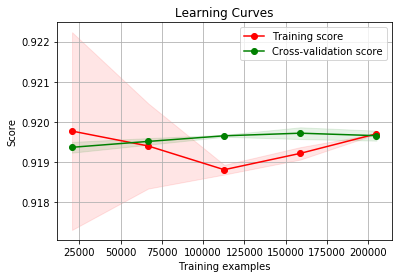

In [48]:
# Learning curves
from sklearn.model_selection import learning_curve

def Plot_learning_curve(estimator, title, X, y, ylim = None, cv = 3,
                        n_jobs = 1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y,
                                                            cv = cv,
                                                            n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

Plot_learning_curve(ada_final_clf, 
                    'Learning Curves',
                    top_training_df, 
                    y_train,
                    n_jobs = 1)

### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(random_state=123)

param_grid = {'max_depth': np.arange(1, 4), 'criterion': ['gini', 'entropy']}

grid_search_tree = GridSearchCV(model_tree, param_grid, verbose=100)

grid_search_tree.fit(top_training_df, y_train)



Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.9192714430656365, total=   3.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.9192714430656365, total=   2.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s
[CV] criterion=gini, max_depth=1 .....................................
[CV]  criterion=gini, max_depth=1, score=0.91927065549301, total=   2.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.9s remaining:    0.0s
[CV] criterion=gini, max_depth=2 .....................................
[CV]  criterion=gini, max_depth=2, score=0.9192714430656365, total=   3.4s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.9s remaining:    0.0s
[CV] criterion=gini, max_depth=2 .....

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [31]:
# Results of the grid search for best n_estimator
print(grid_search_tree.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_tree.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'criterion': 'gini', 'max_depth': 1}
------------
0.9192711805431351 {'criterion': 'gini', 'max_depth': 1}
0.9192711805431351 {'criterion': 'gini', 'max_depth': 2}
0.9192711805431351 {'criterion': 'gini', 'max_depth': 3}
0.9192711805431351 {'criterion': 'entropy', 'max_depth': 1}
0.9192711805431351 {'criterion': 'entropy', 'max_depth': 2}
0.9192711805431351 {'criterion': 'entropy', 'max_depth': 3}


In [32]:
from sklearn.model_selection import cross_val_predict

tree_final_clf = grid_search_tree.best_estimator_
y_probas_tree_final = cross_val_predict(tree_final_clf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_tree_final = y_probas_tree_final[:, 1] 
fpr_tree_final, tpr_tree_final, thresholds_tree_final = roc_curve(y_train, y_scores_tree_final)

print ("AUC: ", auc(fpr_tree_final, tpr_tree_final))

AUC:  0.5887811592205769


In [33]:
predictions = tree_final_clf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('tree_final_importance.csv', index = False)

#### On top 300+ with max-depth

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Base estimator from above
model_ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1, criterion='gini'),random_state=123)

param_distributions = {'n_estimators': [20, 250, 300], 'learning_rate': [0.01, 0.1, 0.5, 0.7, 0.8]}

grid_search_ada_cv = GridSearchCV(model_ada, param_distributions, cv=2, verbose=100) 
grid_search_ada_cv.fit(top_training_df, y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV] learning_rate=0.01, n_estimators=20 .............................
[CV]  learning_rate=0.01, n_estimators=20, score=0.9192681911600198, total=  19.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s
[CV] learning_rate=0.01, n_estimators=20 .............................
[CV]  learning_rate=0.01, n_estimators=20, score=0.9192741699456928, total=  18.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.7s remaining:    0.0s
[CV] learning_rate=0.01, n_estimators=250 ............................
[CV]  learning_rate=0.01, n_estimators=250, score=0.9192681911600198, total= 4.0min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min remaining:    0.0s
[CV] learning_rate=0.01, n_estimators=250 ............................
[CV]  learning_rate=0.01, n_estimators=250, score=0.9192741699456928, total= 4.0min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.9min remaining:    0.0s
[

GridSearchCV(cv=2, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=123),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 250, 300], 'learning_rate': [0.01, 0.1, 0.5, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [36]:
# Results of the grid search for best n_estimator
print(grid_search_ada_cv.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_ada_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'learning_rate': 0.5, 'n_estimators': 250}
------------
0.9192711805431351 {'learning_rate': 0.01, 'n_estimators': 20}
0.9192711805431351 {'learning_rate': 0.01, 'n_estimators': 250}
0.9192711805431351 {'learning_rate': 0.01, 'n_estimators': 300}
0.9192711805431351 {'learning_rate': 0.1, 'n_estimators': 20}
0.9194045091069913 {'learning_rate': 0.1, 'n_estimators': 250}
0.919398005274608 {'learning_rate': 0.1, 'n_estimators': 300}
0.9193102035374344 {'learning_rate': 0.5, 'n_estimators': 20}
0.9195280819222726 {'learning_rate': 0.5, 'n_estimators': 250}
0.9195183261736979 {'learning_rate': 0.5, 'n_estimators': 300}
0.9193167073698176 {'learning_rate': 0.7, 'n_estimators': 20}
0.9193297150345842 {'learning_rate': 0.7, 'n_estimators': 250}
0.919323211202201 {'learning_rate': 0.7, 'n_estimators': 300}
0.9190825694040213 {'learning_rate': 0.8, 'n_estimators': 20}
0.919186630722153 {'learning_rate': 0.8, 'n_estimators': 250}
0.9190663098230633 {'learning_rate': 0.8, 'n_estimators': 300}


In [37]:
# Find BEST model
from sklearn.model_selection import cross_val_predict

ada_final_clf = grid_search_ada_cv.best_estimator_
y_probas_ada_final = cross_val_predict(ada_final_clf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_ada_final = y_probas_ada_final[:, 1] 
fpr_ada_final, tpr_ada_final, thresholds_ada_final = roc_curve(y_train, y_scores_ada_final)

print ("AUC: ", auc(fpr_ada_final, tpr_ada_final))

AUC:  0.7662245983446423


In [38]:
predictions = ada_final_clf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('ada_final_importance_with_base.csv', index = False)

### SGD

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(top_training_df)

X_tr = scaler.transform(top_training_df)
X_te = scaler.transform(top_testing_df)

In [41]:
from sklearn.linear_model import SGDClassifier

model_sgd = SGDClassifier(random_state=123)

param_distributions = {'loss': ['log', 'modified_huber'], 'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 'penalty': ['l1', 'l2']}

grid_search_sgd_cv = GridSearchCV(model_sgd, param_distributions, cv=2, verbose=100) 
grid_search_sgd_cv.fit(X_tr, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits
[CV] alpha=0.0001, loss=log, penalty=l1 ..............................
[CV]  alpha=0.0001, loss=log, penalty=l1, score=0.9177462993314082, total=   4.6s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[CV] alpha=0.0001, loss=log, penalty=l1 ..............................
[CV]  alpha=0.0001, loss=log, penalty=l1, score=0.9131215245032682, total=   4.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s
[CV] alpha=0.0001, loss=log, penalty=l2 ..............................
[CV]  alpha=0.0001, loss=log, penalty=l2, score=0.9032428002809646, total=   3.6s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.9s remaining:    0.0s
[CV] alpha=0.0001, loss=log, penalty=l2 ..............................
[CV]  alpha=0.0001, loss=log, penalty=l2, score=0.90320314786511, total=   3.7s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.7s remaining:    0.0s
[CV] alph

[CV]  alpha=1.0, loss=log, penalty=l2, score=0.9192741699456928, total=   3.6s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.3min remaining:    0.0s
[CV] alpha=1.0, loss=modified_huber, penalty=l1 ......................
[CV]  alpha=1.0, loss=modified_huber, penalty=l1, score=0.9192681911600198, total=   3.6s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:  2.4min remaining:    0.0s
[CV] alpha=1.0, loss=modified_huber, penalty=l1 ......................
[CV]  alpha=1.0, loss=modified_huber, penalty=l1, score=0.9192741699456928, total=   3.5s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:  2.4min remaining:    0.0s
[CV] alpha=1.0, loss=modified_huber, penalty=l2 ......................
[CV]  alpha=1.0, loss=modified_huber, penalty=l2, score=0.9191576263690523, total=   3.1s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:  2.5min remaining:    0.0s
[CV] alpha=1.0, loss=modified_huber, penalty=l2 ......................
[CV]  alpha=1.0, loss=modified_huber, penalty=l

GridSearchCV(cv=2, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=123, shuffle=True,
       tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['log', 'modified_huber'], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [42]:
# Results of the grid search for best n_estimator
print(grid_search_sgd_cv.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_sgd_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}
------------
0.9154339194370282 {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}
0.9032229741375105 {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l2'}
0.8907843947045797 {'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'l1'}
0.875220723811506 {'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'l2'}
0.9021563456266605 {'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'}
0.9187248586229436 {'alpha': 0.001, 'loss': 'log', 'penalty': 'l2'}
0.9027904692840256 {'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l1'}
0.9003612878888885 {'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l2'}
0.9103576782619158 {'alpha': 0.01, 'loss': 'log', 'penalty': 'l1'}
0.9184777129923808 {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
0.9077333818952817 {'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'l1'}
0.9142957487699627 {'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'l2'}
0.9192711805431351 {'alpha': 0.1, 'loss': 'log', 'penalty':

In [45]:
from sklearn.model_selection import cross_val_predict

sgd_final_clf = grid_search_sgd_cv.best_estimator_
y_probas_sgd_final = cross_val_predict(sgd_final_clf, X_tr, y_train, cv=3, method="predict_proba")
y_scores_sgd_final = y_probas_sgd_final[:, 1] 
fpr_sgd_final, tpr_sgd_final, thresholds_sgd_final = roc_curve(y_train, y_scores_sgd_final)

print ("AUC: ", auc(fpr_sgd_final, tpr_sgd_final))

AUC:  0.7275975446842655


In [47]:
predictions = grid_search_sgd_cv.predict_proba(X_te)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('sgd_final_importance.csv', index = False)

### GradientBoosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbc = GradientBoostingClassifier(random_state=123)

param_distributions = {'max_depth': np.arange(1, 4), 'n_estimators': [20, 250, 300], 'learning_rate': [0.01, 0.1, 0.5, 0.7] }

grid_search_gbc_cv = GridSearchCV(model_gbc, param_distributions, cv=2, verbose=100) 
grid_search_gbc_cv.fit(top_training_df, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] learning_rate=0.01, max_depth=1, n_estimators=20 ................
[CV]  learning_rate=0.01, max_depth=1, n_estimators=20, score=0.9192681911600198, total=  10.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=20 ................
[CV]  learning_rate=0.01, max_depth=1, n_estimators=20, score=0.9192741699456928, total=  10.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.4s remaining:    0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=250, score=0.9192681911600198, total= 1.5min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s
[CV] learning_rate=0.01, max_depth=1, n_estimators=250 ...............
[CV]  learning_rate=0.01, max_depth=1, n_estimators=250, score=0.9192741699456928, total= 1.4min
[Parallel(n_jobs=1)]: Done   

[CV]  learning_rate=0.1, max_depth=3, n_estimators=250, score=0.9194562778446229, total= 6.5min
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed: 88.4min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=0.9192291682926195, total= 7.8min
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 96.3min remaining:    0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=300, score=0.9194432701375566, total= 7.7min
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 104.0min remaining:    0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=20 .................
[CV]  learning_rate=0.5, max_depth=1, n_estimators=20, score=0.919255183537553, total=  10.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed: 104.2min remaining:    0.0s
[CV] learning_rate=0.5, max_depth=1, n_estimators=20 .................
[CV]  learni

[CV]  learning_rate=0.7, max_depth=3, n_estimators=20, score=0.9179668953855159, total=  34.5s
[Parallel(n_jobs=1)]: Done  68 out of  68 | elapsed: 177.9min remaining:    0.0s
[CV] learning_rate=0.7, max_depth=3, n_estimators=250 ................
[CV]  learning_rate=0.7, max_depth=3, n_estimators=250, score=0.9120034340123312, total= 5.8min
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed: 183.7min remaining:    0.0s
[CV] learning_rate=0.7, max_depth=3, n_estimators=250 ................
[CV]  learning_rate=0.7, max_depth=3, n_estimators=250, score=0.912132938766219, total= 5.8min
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 189.5min remaining:    0.0s
[CV] learning_rate=0.7, max_depth=3, n_estimators=300 ................
[CV]  learning_rate=0.7, max_depth=3, n_estimators=300, score=0.9111579385519915, total= 6.7min
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed: 196.2min remaining:    0.0s
[CV] learning_rate=0.7, max_depth=3, n_estimators=300 ................
[CV]  lear

GridSearchCV(cv=2, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3]), 'n_estimators': [20, 250, 300], 'learning_rate': [0.01, 0.1, 0.5, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=100)

In [29]:
# Results of the grid search for best n_estimator
print(grid_search_gbc_cv.best_params_)
print ("------------")

# Results of the grid search in general
cvres = grid_search_gbc_cv.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
------------
0.9192711805431351 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 20}
0.9192711805431351 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.9192711805431351 {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 300}
0.9192711805431351 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 20}
0.9192711805431351 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250}
0.9192711805431351 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 300}
0.9192711805431351 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 20}
0.9192841882079015 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.9193362188669674 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
0.9192711805431351 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20}
0.9194597916822488 {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}
0.9195118223413146 {'learning_rate': 0.1, 'max_depth'

In [30]:
from sklearn.model_selection import cross_val_predict

gbc_final_clf = grid_search_gbc_cv.best_estimator_
y_probas_gbc_final = cross_val_predict(gbc_final_clf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_gbc_final = y_probas_gbc_final[:, 1] 
fpr_gbc_final, tpr_gbc_final, thresholds_gbc_final = roc_curve(y_train, y_scores_gbc_final)

print ("AUC: ", auc(fpr_gbc_final, tpr_gbc_final))

AUC:  0.7591007427604333


In [31]:
predictions = grid_search_gbc_cv.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('gbc_final_importance.csv', index = False)

### Ensemble of ensembles

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# conda install py-xgboost
import xgboost as xgb

# To make this notebook's output stable across runs
np.random.seed(123)

# Use n_estimators = 300 as guess and any tuning optimizers from above. Everything else = default
clf1 = AdaBoostClassifier(learning_rate=0.5, n_estimators=250) # Optimized, weight = 2
clf2 = ExtraTreesClassifier(n_estimators=300) # Default
clf3 = xgb.XGBClassifier(n_estimators=300) # Default
clf4 = GradientBoostingClassifier(learning_rate=0.1, max_depth=1, n_estimators=300) # Optimized, weight = 2
eclf = VotingClassifier(estimators=[('ab', clf1), ('etc', clf2), ('xgb', clf3),('gbc', clf4)], weights=[2,1,1,2], voting='soft')
eclf = eclf.fit(top_training_df, y_train)


In [33]:
from sklearn.model_selection import cross_val_predict

y_probas_vote_final = cross_val_predict(eclf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_vote_final = y_probas_vote_final[:, 1] 
fpr_vote_final, tpr_vote_final, thresholds_vote_final = roc_curve(y_train, y_scores_vote_final)

print ("AUC: ", auc(fpr_vote_final, tpr_vote_final))

AUC:  0.7686778745160642


In [34]:
predictions = eclf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('default_voting_classifier_final_importance.csv', index = False)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# conda install py-xgboost
import xgboost as xgb

# classifier from xgboost
clf1 = AdaBoostClassifier(n_estimators=300)
clf2 = ExtraTreesClassifier(n_estimators=300, n_jobs=-1, criterion='gini',max_depth=5)
clf3 = xgb.XGBClassifier(n_estimators=300, nthread=-1, max_depth = 5, seed=1234)
clf4 = GradientBoostingClassifier(n_estimators=300)
eclf = VotingClassifier(estimators=[('ab', clf1), ('etc', clf2), ('xgb', clf3),('gbc', clf4)], weights=[1,1,1,1], voting='soft')
eclf = eclf.fit(top_training_df, y_train)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_probas_vote_final = cross_val_predict(eclf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_vote_final = y_probas_vote_final[:, 1] 
fpr_vote_final, tpr_vote_final, thresholds_vote_final = roc_curve(y_train, y_scores_vote_final)

print ("AUC: ", auc(fpr_vote_final, tpr_vote_final))

In [ ]:
predictions = eclf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('voting_classifier_ensem_features_final2.csv', index = False)

### Ensemble of 'best'


In [ ]:
# Trying out GPC first. Only 'new' one.
# Kernel died trying to run this twice.

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_predict

b_clf5 = GaussianProcessClassifier (1.0 * RBF(1.0), warm_start=True)

y_probas_gpc_final = cross_val_predict(b_clf5, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_gpc_final = y_probas_gpc_final[:, 1] 
fpr_gpc_final, tpr_gpc_final, thresholds_gpc_final = roc_curve(y_train, y_scores_gpc_final)

print ("AUC: ", auc(fpr_gpc_final, tpr_gpc_final))

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# To make this notebook's output stable across runs
np.random.seed(123)

b_clf1 = RandomForestClassifier(n_estimators=300)
b_clf2 = LogisticRegression(C=10, penalty='l1')
b_clf3 = DecisionTreeClassifier (max_depth=1, criterion='gini') 
# b_clf4 = SGDClassifier (alpha=0.1, loss='log', penalty='l2') ---
# b_clf5 = GaussianProcessClassifier () # Only 'new' one - kills kernel
b_eclf = VotingClassifier(estimators=[('rfor', b_clf1), ('logreg', b_clf2), ('dt', b_clf3)], weights=[1,1,1], voting='soft')
b_eclf = b_eclf.fit(top_training_df, y_train)

In [20]:
from sklearn.model_selection import cross_val_predict

y_probas_bvote_final = cross_val_predict(b_eclf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_bvote_final = y_probas_bvote_final[:, 1] 
fpr_bvote_final, tpr_bvote_final, thresholds_bvote_final = roc_curve(y_train, y_scores_bvote_final)

print ("AUC: ", auc(fpr_bvote_final, tpr_bvote_final))

AUC:  0.7585946821356537


In [21]:
predictions = b_eclf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('best_voting_classifier_final_importance.csv', index = False)

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# To make this notebook's output stable across runs
np.random.seed(123)

b_clf1 = RandomForestClassifier(n_estimators=300)
b_clf2 = LogisticRegression(C=10, penalty='l1')
b_clf3 = DecisionTreeClassifier (max_depth=1, criterion='gini') 
b_clf4 = SGDClassifier (alpha=0.1, loss='log', penalty='l2')
# b_clf5 = GaussianProcessClassifier () # Only 'new' one - kills kernel
b_eclf = VotingClassifier(estimators=[('rfor', b_clf1), ('logreg', b_clf2), ('dt', b_clf3), ('sgd', b_clf4)], weights=[1,1,1,1], voting='soft')
b_eclf = b_eclf.fit(top_training_df, y_train)

In [ ]:
from sklearn.model_selection import cross_val_predict

y_probas_bvote_final = cross_val_predict(b_eclf, top_training_df, y_train, cv=3, method="predict_proba")
y_scores_bvote_final = y_probas_bvote_final[:, 1] 
fpr_bvote_final, tpr_bvote_final, thresholds_bvote_final = roc_curve(y_train, y_scores_bvote_final)

print ("AUC: ", auc(fpr_bvote_final, tpr_bvote_final))

In [ ]:
predictions = b_eclf.predict_proba(top_testing_df)[:, 1]
submit = load_credit_data ("submit_labels.csv")
submit['TARGET'] = predictions
submit.to_csv('best_voting_classifier_final_importance2.csv', index = False)

### Submission Scores
1. Log - Top 30 only: 0.724
2. Log - Top 300 + : 0.759 **
3. Log - all columns : 0.576 (WORST!)
4. SVM: --- DID NOT COMPLETE ---
5. Ada (Default = Decision) - Top 30 only: 0.731
6. Ada (Default = Decision) and BASE - Top 300 + : 0.760 **
7. Decision tree - Topp 300 + : 0.666
8. SGD - Top 300 + : 0.739 **
9. GBC - Top 300 + : 0.749 **
9. Voting with ensembles - Top 300 + : 0.768 (1-1 weights) and 0.761 (special weights)  **    
10. Voting with ensembles on 'best' - Top 300 + : ?  **
    
Did not submit: KNN

** Try final engineered dataset on    

## Feature selection (enhanced)
### Add new features --- if time permits (see new notebook)

In [ ]:
# See MLProject_NewFeatures 

###  Other things to consider
(with more computational power and time)
1. Look at dropping columns with NULL > threshold (prior to merging)
2. Feature engineering:
    1. Look at important features a bit more to find relationships to exploit, including looking at those from other classifiers
    2. Look at relationships within merged tables prior to merging
3. Modelling:
    1. Tune a neural network with at least a depth of 3 
    2. Run more tuning
    3. More models from http://scikit-learn.org/stable/supervised_learning.html
    4. More investigation on poly-2 or poly-3 with Log Reg or SGD